In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
df=pd.read_csv('haberman.csv')

In [3]:
df

,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1
...,...,...,...,...
300,75,62,1,1
301,76,67,0,1
302,77,65,3,1
303,78,65,1,2


# Naming columns

In [4]:
df.columns=['Age','op_year','axil_node','survival_status']

In [5]:
df.columns

Index(['Age', 'op_year', 'axil_node', 'survival_status'], dtype='object')

In [7]:
df

,Age,op_year,axil_node,survival_status
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1
...,...,...,...,...
300,75,62,1,1
301,76,67,0,1
302,77,65,3,1
303,78,65,1,2


In [8]:
df.shape

(305, 4)

In [9]:
df.size

1220

In [10]:
df.head()

,Age,op_year,axil_node,survival_status
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [11]:
df.tail()

,Age,op_year,axil_node,survival_status
300,75,62,1,1
301,76,67,0,1
302,77,65,3,1
303,78,65,1,2
304,83,58,2,2


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              305 non-null    int64
 1   op_year          305 non-null    int64
 2   axil_node        305 non-null    int64
 3   survival_status  305 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [13]:
df.value_counts()

Age  op_year  axil_node  survival_status
61   59       0          1                  3
37   63       0          1                  2
48   58       11         2                  2
55   58       1          1                  2
65   64       0          1                  2
                                           ..
48   67       7          2                  1
49   60       1          1                  1
     61       0          1                  1
              1          1                  1
83   58       2          2                  1
Name: count, Length: 288, dtype: int64

In [14]:
df.describe()

,Age,op_year,axil_node,survival_status
count,305.000000,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066,1.265574
std,10.744024,3.254078,7.199370,0.442364
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,61.000000,66.000000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [15]:
df.duplicated().sum()

17

In [16]:
df.isnull().sum()

Age                0
op_year            0
axil_node          0
survival_status    0
dtype: int64

# Univarient analysis

In [17]:
df.columns

Index(['Age', 'op_year', 'axil_node', 'survival_status'], dtype='object')

In [18]:
df['Age'].unique()

array([30, 31, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47,
       48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64,
       65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 83],
      dtype=int64)

In [19]:
def check_gaussian(data):
    sns.distplot(data)
    plt.show()
    stats.probplot(data,dist='norm',plot=plt)
    plt.show()
    a=stats.anderson(data)
    if (a.statistic>a.critical_values[2]):
        print('column is non-gaussian')
    else:
        print('column is gaussian')

C:\Users\shiva\AppData\Local\Temp\ipykernel_15024\692260998.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data)


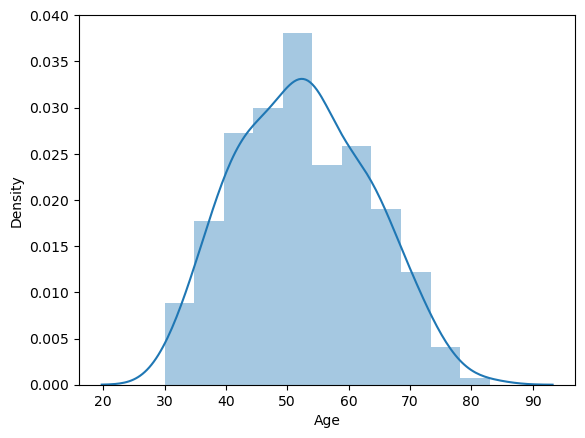

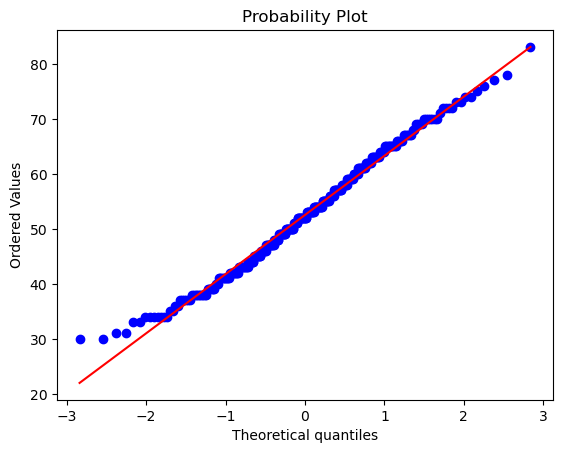

column is gaussian


In [20]:
check_gaussian(df['Age'])

<Axes: ylabel='Age'>

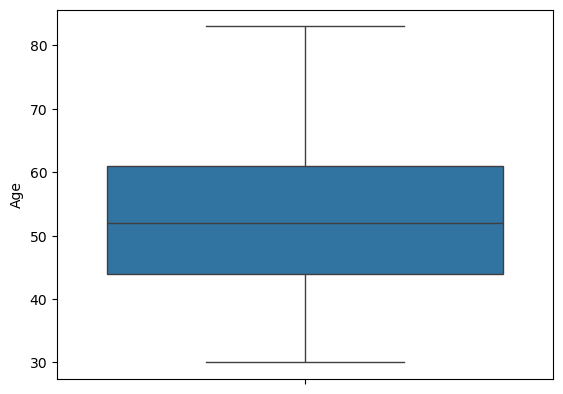

In [21]:
sns.boxplot(df['Age'])

<Axes: xlabel='survival_status', ylabel='Age'>

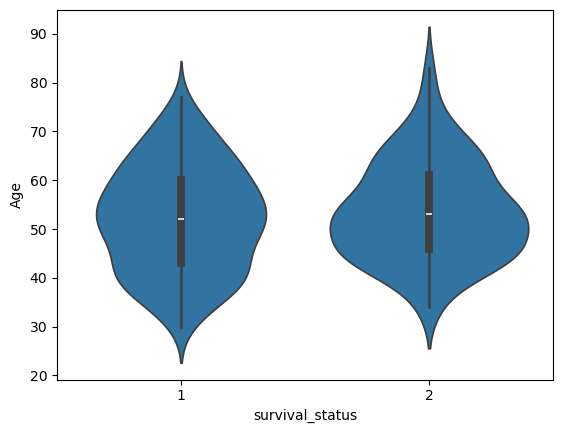

In [22]:
sns.violinplot(x='survival_status',y='Age',data=df)

#### From displot we can conclude that there are more more points between 20 to 50 
#### The Q-Q plot says that the distribution is gaussian
#### No outliers
#### Violin plots indicates both has same median range more concetrated around the median

In [23]:
df['op_year'].unique()

array([62, 65, 59, 58, 60, 66, 61, 67, 64, 63, 69, 68], dtype=int64)

C:\Users\shiva\AppData\Local\Temp\ipykernel_15024\692260998.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data)


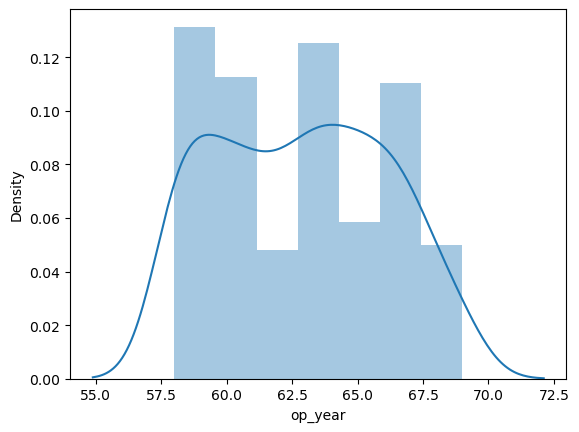

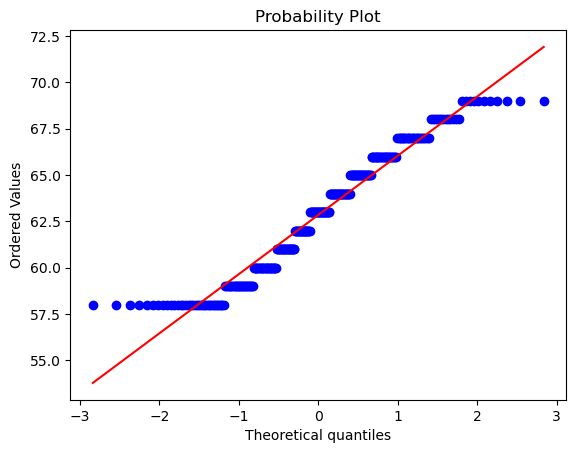

column is non-gaussian


In [56]:
check_gaussian(df['op_year'])

<Axes: ylabel='op_year'>

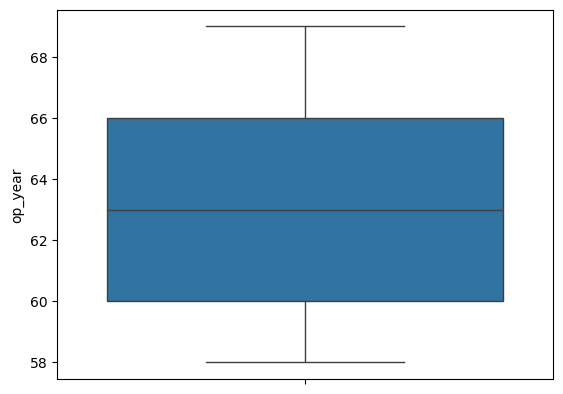

In [57]:
sns.boxplot(df['op_year'])

<Axes: xlabel='op_year', ylabel='count'>

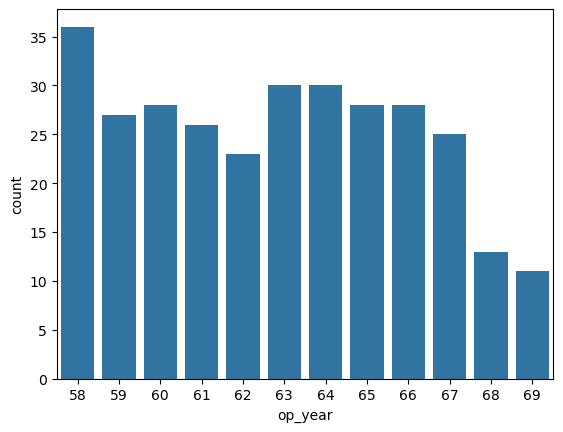

In [24]:
sns.barplot(df['op_year'].value_counts())

#### The data points are more in 58 operations(~38)
#### op_year and less in 69 operations are (11)
#### From 1958 to 1069 the operations overall dropping 


In [25]:
df['axil_node'].unique()

array([ 3,  0,  2,  4, 10,  9, 30,  1,  7, 13,  6, 15, 21, 11,  5, 23,  8,
       20, 52, 14, 19, 16, 12, 24, 46, 18, 22, 35, 17, 25, 28],
      dtype=int64)

In [26]:
df['axil_node'].value_counts()

axil_node
0     136
1      40
3      20
2      20
4      13
7       7
6       7
8       7
9       6
5       6
13      5
14      4
11      4
22      3
19      3
23      3
15      3
10      3
20      2
12      2
21      1
52      1
30      1
16      1
24      1
46      1
18      1
35      1
17      1
25      1
28      1
Name: count, dtype: int64

<Axes: xlabel='axil_node', ylabel='count'>

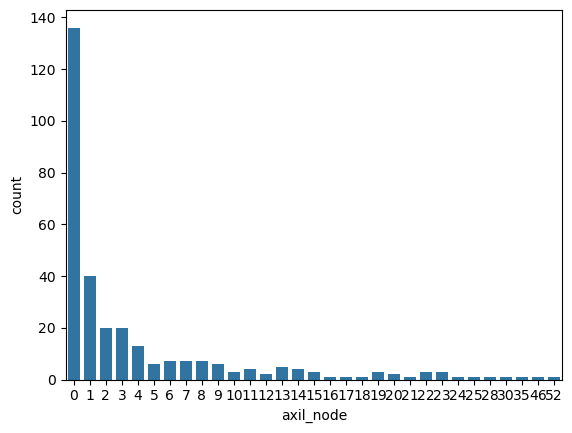

In [27]:
sns.barplot(df['axil_node'].value_counts())

C:\Users\shiva\AppData\Local\Temp\ipykernel_15024\692260998.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data)


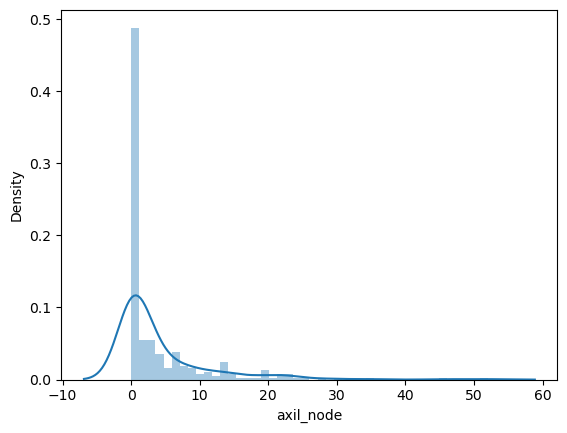

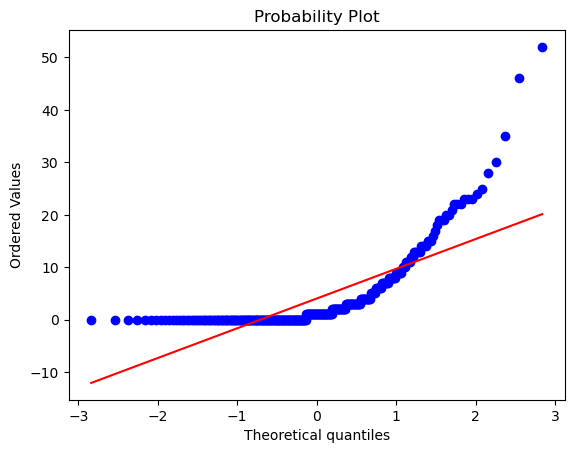

column is non-gaussian


In [58]:
check_gaussian(df['axil_node'])

<Axes: ylabel='axil_node'>

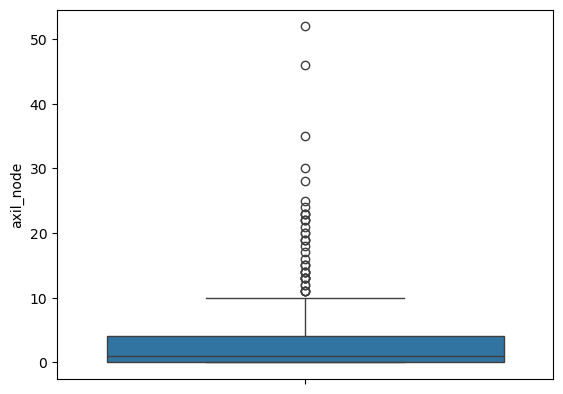

In [59]:
sns.boxplot(df['axil_node'])

<Axes: xlabel='axil_node', ylabel='count'>

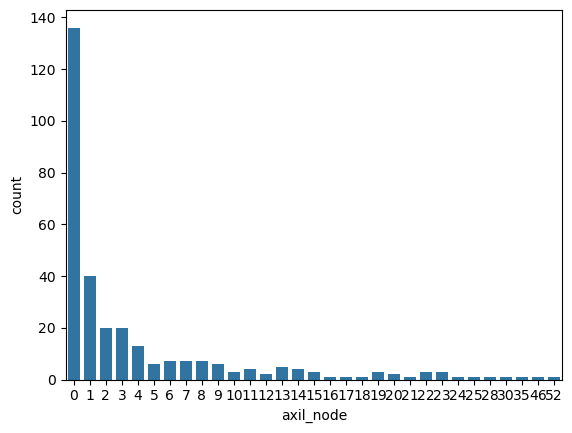

In [60]:
sns.barplot(df['axil_node'].value_counts())

<Axes: xlabel='survival_status', ylabel='count'>

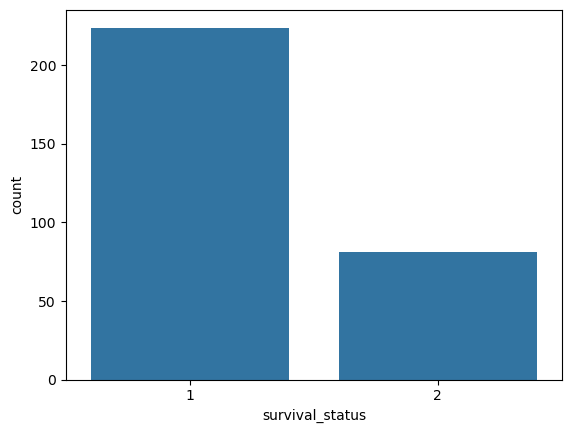

In [61]:
sns.countplot(x='survival_status',data=df)

# 1 has the most survivate rate than 2

# Bivariant analysis

In [62]:
sur=df[df['survival_status']==1]['Age']
non_sur=df[df['survival_status']==2]['Age']

In [63]:
t_stats,p=stats.ttest_ind(sur,non_sur,alternative='two-sided')

In [64]:
p

0.26254798164754417

#### AS p value is greater than 0.05 so we cannot reject H0 which means there is significance difference in the average of ages

<Axes: xlabel='survival_status', ylabel='Age'>

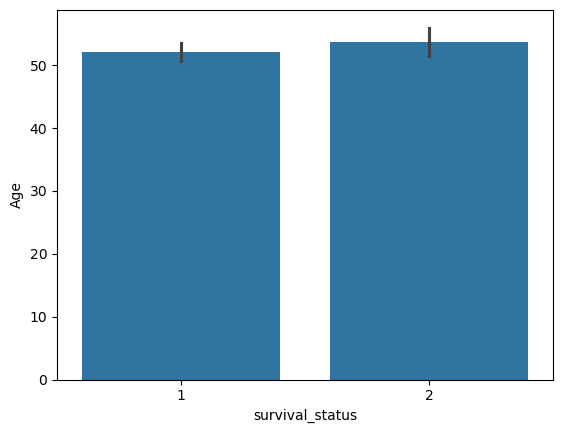

In [65]:
sns.barplot(x=df['survival_status'],y=df['Age'])

In [66]:
df.columns

Index(['Age', 'op_year', 'axil_node', 'survival_status'], dtype='object')

In [95]:
df['survival_status'].value_counts()

survival_status
1    224
2     81
Name: count, dtype: int64

# Multivariant analysis

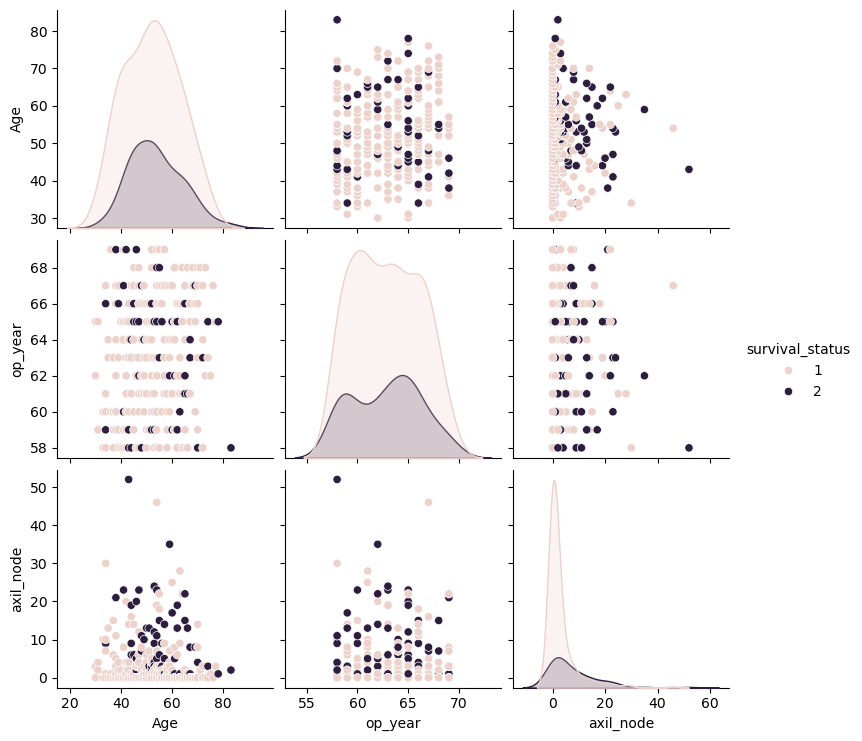

In [72]:
sns.pairplot(df,hue='survival_status')

<Axes: >

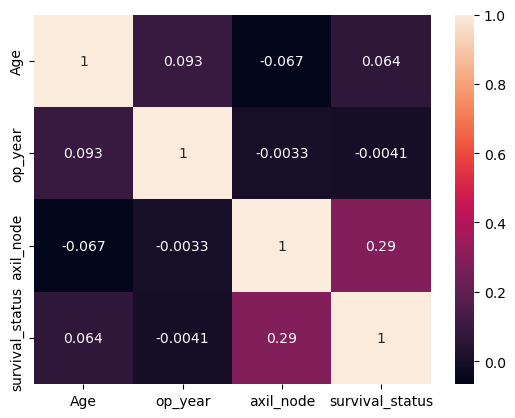

In [73]:
sns.heatmap(df.select_dtypes(include='number').corr(),annot=True)

#### only axil_node and survival_status has correlation

In [76]:
df.columns

Index(['Age', 'op_year', 'axil_node', 'survival_status'], dtype='object')

In [77]:
x=df.drop('survival_status',axis=1)

In [78]:
y=df['survival_status']

In [80]:
from sklearn.model_selection import train_test_split

In [82]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=(0.2))

In [83]:
len(x_train)

244

In [98]:
len(y_train)

244

In [101]:
from sklearn.neighbors import KNeighborsClassifier

In [102]:
knn=KNeighborsClassifier()

In [103]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [104]:
knn.score(x_test,y_test)

0.7377049180327869

In [105]:
knn=KNeighborsClassifier(n_neighbors=5,algorithm='kd_tree')

In [106]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='kd_tree')

In [107]:
knn.score(x_test,y_test)

0.7377049180327869

In [108]:
knn=KNeighborsClassifier(n_neighbors=5,algorithm='ball_tree')

In [109]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='ball_tree')

In [110]:
knn.score(x_test,y_test)

0.7377049180327869

In [111]:
knn=KNeighborsClassifier(n_neighbors=5,algorithm='brute')

In [112]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='brute')

In [113]:
knn.score(x_train,y_train)

0.7622950819672131

In [114]:
knn=KNeighborsClassifier(n_neighbors=5)

In [115]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [116]:
knn.score(x_test,y_test)

0.7377049180327869

## Model: K-Nearest Neighbors (KNN)
   Train-Test Split: 80% training, 20% testing
   
   Target Variable: status (0 = survived, 1 = died)
   
   Features Used: age, year, nodes

## The Brute-Force algorithm gave the highest accuracy (76.22%), outperforming both kd_tree and ball_tree

## hanging the number of neighbors (k=5) had no effect on accuracy — possibly because it is already the default value or the dataset is too small

# Distance  Based weights

In [117]:
knn_distance=KNeighborsClassifier(n_neighbors=5,weights='distance')

In [118]:
knn_distance.fit(x_train,y_train)

KNeighborsClassifier(weights='distance')

In [119]:
knn_distance.score(x_test,y_test)

0.7540983606557377

In [120]:
from sklearn.model_selection import cross_val_score

In [121]:
k_value=range(1,15)
cv_scores=[]

In [122]:
for k in k_value:
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn,x,y,cv=5,scoring='accuracy')
    cv_scores.append(np.mean(scores))

In [123]:
cv_scores

[0.6819672131147541,
 0.718032786885246,
 0.6983606557377049,
 0.718032786885246,
 0.7180327868852459,
 0.7540983606557377,
 0.7475409836065574,
 0.7475409836065573,
 0.7311475409836066,
 0.7508196721311475,
 0.7540983606557377,
 0.7606557377049181,
 0.7639344262295082,
 0.7672131147540984]

In [124]:
cv_scores.index(max(cv_scores))

13

In [125]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=7,weights='distance')

In [126]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7, weights='distance')

In [127]:
knn.score(x_test,y_test)

0.7868852459016393

In [128]:
knn=KNeighborsClassifier(n_neighbors=7,algorithm='ball_tree',weights='distance')

In [129]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='ball_tree', n_neighbors=7, weights='distance')

In [130]:
knn.score(x_test,y_test)

0.7868852459016393

In [131]:
knn=KNeighborsClassifier(n_neighbors=7,algorithm='kd_tree',weights='distance')

In [132]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='kd_tree', n_neighbors=7, weights='distance')

In [133]:
knn.score(x_test,y_test)

0.7868852459016393

## Cross-validation (K-Fold) improved the model's performance by reducing variance and providing a more reliable accuracy estimate.

## Tree-based algorithms (kd_tree and ball_tree) both yielded 78.68% accuracy, better than brute-force.

## Using weights='distance' often helps because it gives closer neighbors

# PCA

In [135]:
df.columns

Index(['Age', 'op_year', 'axil_node', 'survival_status'], dtype='object')

In [136]:
df1=df.drop('survival_status',axis=1)

In [137]:
df1

,Age,op_year,axil_node
0,30,62,3
1,30,65,0
2,31,59,2
3,31,65,4
4,33,58,10
...,...,...,...
300,75,62,1
301,76,67,0
302,77,65,3
303,78,65,1


In [138]:
from sklearn.preprocessing import StandardScaler

In [139]:
scaler=StandardScaler()

In [140]:
scaler

StandardScaler()

In [141]:
scaled_data=scaler.fit_transform(df1)

In [142]:
scaled_data

array([[-2.10053274e+00, -2.61387704e-01, -1.44147084e-01],
       [-2.10053274e+00,  6.62047621e-01, -5.61535003e-01],
       [-2.00730479e+00, -1.18482303e+00, -2.83276391e-01],
       [-2.00730479e+00,  6.62047621e-01, -5.01777826e-03],
       [-1.82084888e+00, -1.49263480e+00,  8.29758059e-01],
       [-1.82084888e+00, -8.77011254e-01, -5.61535003e-01],
       [-1.72762093e+00, -1.18482303e+00, -5.61535003e-01],
       [-1.72762093e+00,  9.69859396e-01,  6.90628753e-01],
       [-1.72762093e+00, -1.49263480e+00,  3.61234418e+00],
       [-1.72762093e+00, -8.77011254e-01, -4.22405697e-01],
       [-1.72762093e+00, -5.69199479e-01,  8.29758059e-01],
       [-1.72762093e+00,  1.27767117e+00,  4.12370140e-01],
       [-1.72762093e+00, -8.77011254e-01, -5.61535003e-01],
       [-1.63439298e+00,  3.54235846e-01,  1.24714598e+00],
       [-1.63439298e+00,  4.64240710e-02, -5.61535003e-01],
       [-1.54116503e+00, -8.77011254e-01, -4.22405697e-01],
       [-1.54116503e+00,  1.89329472e+00

In [143]:
from sklearn.decomposition import PCA

In [217]:
pca=PCA(n_components=2)

In [218]:
pca

PCA(n_components=2)

In [219]:
pca_data=pca.fit_transform(scaled_data)

In [220]:
pca_data

array([[-1.56464875e+00, -2.88826134e-01],
       [-8.58638081e-01, -8.92315427e-02],
       [-1.97118338e+00, -9.39584034e-01],
       [-1.02717578e+00,  3.63643794e-01],
       [-2.48509396e+00, -2.13369722e-01],
       [-1.54640645e+00, -9.84345306e-01],
       [-1.65777245e+00, -1.16302565e+00],
       [-9.46441702e-01,  1.11077235e+00],
       [-3.58965913e+00,  2.04758291e+00],
       [-1.53943900e+00, -8.70484462e-01],
       [-1.88911928e+00,  3.26095375e-01],
       [-6.52603097e-01,  1.06429905e+00],
       [-1.48093728e+00, -9.83489292e-01],
       [-1.46864975e+00,  1.20457496e+00],
       [-8.84962600e-01, -4.44024196e-01],
       [-1.40850067e+00, -8.68772434e-01],
       [ 2.41517595e-01,  6.34049984e-01],
       [-1.28452979e+00, -9.80921251e-01],
       [-7.54024271e-01, -4.42312168e-01],
       [-1.63820013e+00, -1.33999397e+00],
       [-1.81237526e+00, -4.82428628e-01],
       [-2.16205554e+00,  7.14151209e-01],
       [-7.54024271e-01, -4.42312168e-01],
       [-8.

In [221]:
pca.explained_variance_

array([1.11928902, 1.00017347])

In [222]:
pca_data.shape

(305, 2)

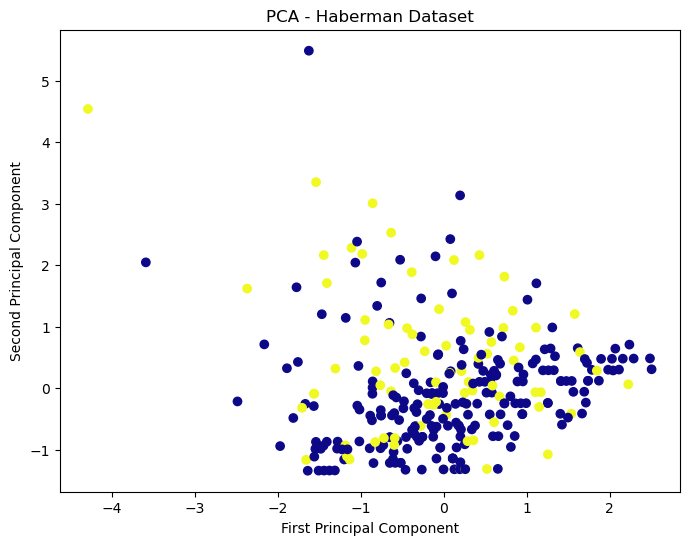

In [223]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=df['survival_status'], cmap='plasma')  
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA - Haberman Dataset')
plt.show()


# t-sne

In [153]:
from sklearn.manifold import TSNE

In [154]:
tsne=TSNE(n_components=2)

In [155]:
tsne

TSNE()

In [157]:
df2=df.drop('survival_status',axis=1)

In [158]:
df2

,Age,op_year,axil_node
0,30,62,3
1,30,65,0
2,31,59,2
3,31,65,4
4,33,58,10
...,...,...,...
300,75,62,1
301,76,67,0
302,77,65,3
303,78,65,1


In [159]:
from sklearn.preprocessing import StandardScaler

In [160]:
scaler=StandardScaler()

In [161]:
scaler

StandardScaler()

In [162]:
scaled_data=scaler.fit_transform(df2)

In [163]:
tsne_data=tsne.fit_transform(scaled_data)

In [164]:
tsne_data

array([[-12.05282   ,  15.569695  ],
       [ -8.639052  ,  17.084576  ],
       [-14.309471  , -13.177577  ],
       [ -8.112338  ,  17.056198  ],
       [-11.889758  ,  -8.282368  ],
       [-14.261678  , -12.136212  ],
       [-13.283523  , -13.288687  ],
       [ -5.4589624 ,   9.220998  ],
       [-11.307799  ,   1.4522682 ],
       [-13.786586  , -11.519018  ],
       [-11.771589  ,  -7.2143397 ],
       [ -5.1106915 ,  10.132359  ],
       [-13.626535  , -12.344129  ],
       [ -6.40889   ,   7.325177  ],
       [-10.34894   ,  15.721553  ],
       [-13.045427  , -11.443897  ],
       [ -2.1736407 ,  16.4226    ],
       [-12.7668705 , -12.255227  ],
       [ -9.851351  ,  15.238026  ],
       [-12.327834  , -14.181841  ],
       [-11.578905  ,  -9.505725  ],
       [-11.511861  ,  -6.440316  ],
       [-10.23223   ,  14.969062  ],
       [ -7.244223  ,   5.146131  ],
       [-11.85125   , -12.967018  ],
       [-12.192067  , -12.017279  ],
       [-12.24176   , -11.405615  ],
 

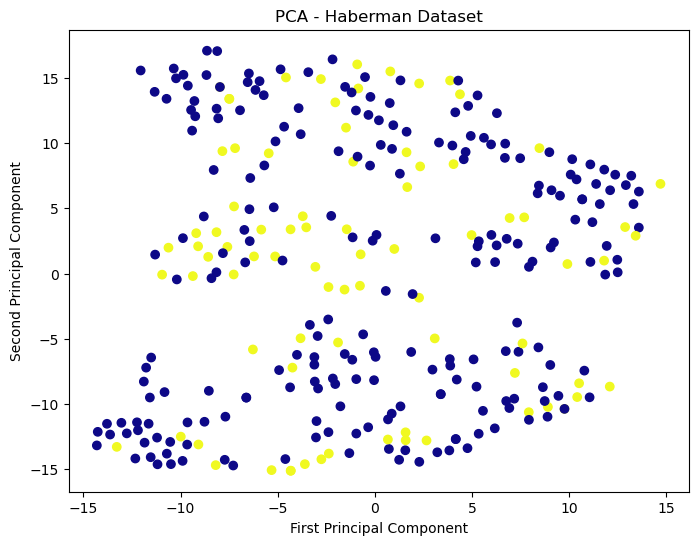

In [165]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=df['survival_status'], cmap='plasma')  
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA - Haberman Dataset')
plt.show()


# Logistic Regression

In [166]:
from sklearn.linear_model import LogisticRegression

In [167]:
lr=LogisticRegression()

In [224]:
df['survival_status'].value_counts()

survival_status
1    224
2     81
Name: count, dtype: int64

In [168]:
df.columns

Index(['Age', 'op_year', 'axil_node', 'survival_status'], dtype='object')

In [169]:
x=df.drop('survival_status',axis=1)

In [170]:
y=df['survival_status']

In [172]:
from sklearn.model_selection import train_test_split

In [173]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=(0.2))

In [174]:
len(x_train)

244

In [175]:
len(y_train)

244

In [176]:
from sklearn.preprocessing import StandardScaler


In [177]:
scaler=StandardScaler()

In [178]:
x_train=scaler.fit_transform(x_train)

In [179]:
x_test=scaler.fit_transform(x_test)

In [180]:
lr.fit(x_train,y_train)

LogisticRegression()

In [181]:
y_pred=lr.predict(x_test)

In [182]:
y_pred

array([1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [183]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [184]:
accuracy_score(y_test,y_pred)

0.7049180327868853

In [185]:
confusion_matrix(y_test,y_pred)

array([[42,  0],
       [18,  1]], dtype=int64)

In [186]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           1       0.70      1.00      0.82        42\n           2       1.00      0.05      0.10        19\n\n    accuracy                           0.70        61\n   macro avg       0.85      0.53      0.46        61\nweighted avg       0.79      0.70      0.60        61\n'

## By using LogisticRegression iam getting 70% accuracy


# Random Forest Classifier

In [187]:
from sklearn.ensemble import RandomForestClassifier

In [189]:
rfc = RandomForestClassifier(n_estimators=100, random_state=42)


In [190]:
rfc.fit(x_train, y_train)


RandomForestClassifier(random_state=42)

In [191]:
y_pred = rfc.predict(x_test)


In [192]:
accuracy_score(y_test,y_pred)

0.6885245901639344

In [193]:
accuracy_score(y_test,y_pred)

0.6885245901639344

In [194]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           1       0.73      0.88      0.80        42\n           2       0.50      0.26      0.34        19\n\n    accuracy                           0.69        61\n   macro avg       0.61      0.57      0.57        61\nweighted avg       0.66      0.69      0.66        61\n'

## BY doing Random forest Classifier my accuracy is 68%
## Final conclusion

## Best Model: KNN with cross-validation and weight-based voting.

Accuracy Achieved: 78.68%

